SOLEMNE2 P3

In [2]:
# Imporatamos la triada clásica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# seaborn
import seaborn as sns
# scipy stats para simular
import scipy.stats as stats
plt.style.use('seaborn') # Gráficos estilo seaborn

C:\Users\nikoa\AppData\Local\Temp\ipykernel_3716\816038303.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # Gráficos estilo seaborn


# Exploracion aisles.csv

In [3]:
# ingresamos la base de datos correspondiente a los pasillos del supermercado
#notebook: 'C:\\Users\\nikoa\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\aisles.csv'
#pc: 'D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\aisles.csv'
df_1 = pd.read_csv('D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\aisles.csv' , index_col=False)
# La base de datos incluye una columna de índice. Eliminemosla para evitar futuros conflictos con el "index_col=False"
df_1.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [4]:
df_1['aisle']

0           prepared soups salads
1               specialty cheeses
2             energy granola bars
3                   instant foods
4      marinades meat preparation
                  ...            
129      hot cereal pancake mixes
130                     dry pasta
131                        beauty
132    muscles joints pain relief
133    specialty wines champagnes
Name: aisle, Length: 134, dtype: object

In [5]:
print('nro. de filas:',df_1.shape[0],'/','nro. de columnas:',df_1.shape[1])

nro. de filas: 134 / nro. de columnas: 2


In [6]:
df_1.loc[df_1['aisle'] == 'energy granola bars']

,aisle_id,aisle
2,3,energy granola bars


# Exploracion departments.csv

In [7]:
df_2=pd.read_csv('D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\departments.csv', index_col=False)
df_2.head(10)

,department_id;department
0,1;frozen
1,2;other
2,3;bakery
3,4;produce
4,5;alcohol
5,6;international
6,7;beverages
7,8;pets
8,9;dry goods pasta
9,10;bulk


In [8]:
print('nro. de filas:',df_2.shape[0],'/','nro. de columnas:',df_2.shape[1])

nro. de filas: 21 / nro. de columnas: 1


# Exploracion order_products_prior.csv

In [9]:
#df_3=pd.read_csv('C:\\Users\\nikoa\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\order_products_prior.csv', index_col=False)
df_3=pd.read_csv('D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\order_products__prior.csv', index_col=False)
df_3.head(10)

#2539329


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


### We check orders from a client

In [10]:
df_3.loc[df_3['order_id'] == 2539328]


,order_id,product_id,add_to_cart_order,reordered
24076652,2539328,29487,1,0
24076653,2539328,28745,2,0
24076654,2539328,11182,3,0
24076655,2539328,49683,4,0
24076656,2539328,11534,5,0
24076657,2539328,5479,6,0
24076658,2539328,5212,7,0
24076659,2539328,36961,8,0
24076660,2539328,28156,9,0
24076661,2539328,20580,10,0


### We check that the order number 2539328 belongs to the "aisle_id=83"


In [12]:
#df_6.loc[df_6['product_id'] == 28745]


### We verify which aisle corresponds to aisle_id=81


In [13]:
df_1.loc[df_1['aisle_id'] == 96]


,aisle_id,aisle
95,96,lunch meat


In [14]:
#Filtramos las columnas que no nos servirán para este  
#df_3.drop(columns=['add_to_cart_order','reordered'], inplace=True)

In [15]:
df_3.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [16]:
print('nro. de filas:',df_3.shape[0],'/','nro. de columnas:',df_3.shape[1])

nro. de filas: 32434489 / nro. de columnas: 4


# Exploracion order_products_train.csv

In [60]:
df_4=pd.read_csv('order_products__train.csv', index_col=False)
df_4.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [19]:
df_4.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [20]:
print('nro. de filas:',df_4.shape[0],'/','nro. de columnas:',df_4.shape[1])


nro. de filas: 1384617 / nro. de columnas: 4


# Exploracion orders.csv

In [61]:
df_5=pd.read_csv('orders.csv', index_col=False)
df_5.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [23]:
df_5.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [24]:
print('nro. de filas:',df_5.shape[0],'/','nro. de columnas:',df_5.shape[1])

nro. de filas: 3421083 / nro. de columnas: 7


Exploracion products.csv

In [25]:
df_6=pd.read_csv('D:\\Dropbox\\AppSettings\\User\\VSCodeNotebooks(clases mineria de datos)\\SOLEMNE2\\products.csv', index_col=False)
df_6.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [26]:
#df_6.loc[df_6['aisle_id'] == 96]


In [27]:
#Filtramos las columnas que no nos servirán para este caso
#df_6.drop(columns=['department_id','product_name'], inplace=True)

In [28]:
df_6.head(30)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [29]:
print('nro. de filas:',df_6.shape[0],'/','nro. de columnas:',df_6.shape[1])

nro. de filas: 49688 / nro. de columnas: 4


Generamos la base de datos a trabajar teniendo en cuenta que todos los dataframes estan relacionados. A partir de la exploracion previa se llego a que df_5 se relaciona con df_3 con df_6 con df_1. Siendo df_1 el csv que contiene la informacion de los pasillos y df_5 contiene la info de los clientes. 

In [30]:
#Primero modificamos el dataframe de los clientes para disminuir sus dimensiones.
columna_duplicada=["user_id"]
df_5=df_5.drop_duplicates(subset=columna_duplicada)

In [31]:
#Generamos un dataframe que relacione todas las columnas con algo en comun usando la funcion merge()
df_combinado=pd.merge(df_5, df_3, on='order_id')
df_combinado=pd.merge(df_combinado,df_6,on='product_id')
df_combinado=pd.merge(df_combinado,df_1,on='aisle_id')
df_combinado.head(10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks
1,2497897,52,prior,1,1,9,NaN,196,4,0,Soda,77,7,soft drinks
2,3205960,67,prior,1,3,11,NaN,196,1,0,Soda,77,7,soft drinks
3,1889835,82,prior,1,3,15,NaN,196,6,0,Soda,77,7,soft drinks
4,520620,120,prior,1,3,11,NaN,196,2,0,Soda,77,7,soft drinks
5,2040988,195,prior,1,1,14,NaN,196,2,0,Soda,77,7,soft drinks
6,3226575,360,prior,1,5,12,NaN,196,1,0,Soda,77,7,soft drinks
7,3371566,760,prior,1,2,11,NaN,196,2,0,Soda,77,7,soft drinks
8,231498,793,prior,1,1,10,NaN,196,1,0,Soda,77,7,soft drinks
9,2696986,991,prior,1,3,16,NaN,196,1,0,Soda,77,7,soft drinks


In [32]:
df_combinado.shape

(2078068, 14)

In [33]:
df_combinado.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle'],
      dtype='object')

Generamos eldataframe final con el que trabajaremos que nos muestra la relacion directa entre el cliente y los pasillos donde realizo las compras. Para esto hacemos un crosstab entre user id y aisle en el dataframe anterior.

In [34]:
df_crosstab=pd.crosstab(df_combinado['user_id'],df_combinado['aisle'],dropna=False)
df_crosstab.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,5,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [35]:
df_crosstab.shape

(206209, 134)

In [36]:
df_crosstab.columns

Index(['air fresheners candles', 'asian foods', 'baby accessories',
       'baby bath body care', 'baby food formula', 'bakery desserts',
       'baking ingredients', 'baking supplies decor', 'beauty',
       'beers coolers',
       ...
       'spreads', 'tea', 'tofu meat alternatives', 'tortillas flat bread',
       'trail mix snack mix', 'trash bags liners', 'vitamins supplements',
       'water seltzer sparkling water', 'white wines', 'yogurt'],
      dtype='object', name='aisle', length=134)

Notamos que las dimensiones de este ultimo dataframe tienen sentido ya que son 206.209 clientes en total y son 134 pasillos.

Podemos revisar que clientes llevaron granola/barras de energia de granola o yogurts etc...

In [37]:
print(df_crosstab.filter(like='granola'),df_crosstab.filter(like='yogurt'))


aisle    energy granola bars  granola
user_id                              
1                          0        0
2                          0        0
3                          0        0
4                          0        0
5                          0        0
...                      ...      ...
206205                     0        0
206206                     0        0
206207                     0        0
206208                     1        0
206209                     0        0

[206209 rows x 2 columns] aisle    yogurt
user_id        
1             0
2             0
3             0
4             0
5             1
...         ...
206205        4
206206        0
206207        1
206208        0
206209        1

[206209 rows x 1 columns]


Ahora notamos que la dimensionalidad de este dataframe es muy grande para trabajar con sklearn. Por o tanto se tiene que realizar una reduccion de la dimensionalidad utilizando análisis de componentes principales(pca)

In [38]:
pca = PCA(n_components=2)
project_y = pca.fit_transform(df_crosstab)
print("Varianza acumulada con 10 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 10 dimensiones: 0.29886309874760497


In [39]:
project_y.shape

(206209, 2)

Notamos ahora que toda la info del dataframe esta contenida en este arreglo de 2 columnas

In [40]:
project_y

array([[-1.64528745, -0.47822683],
       [ 0.21697615,  2.04913691],
       [ 0.89705224,  2.77613023],
       ...,
       [ 2.17230885, -0.6422052 ],
       [-0.06188668,  0.98247049],
       [-0.27106274,  1.40364309]])

In [41]:
project_y[:, 0]

array([-1.64528745,  0.21697615,  0.89705224, ...,  2.17230885,
       -0.06188668, -0.27106274])

In [42]:
project_y[:, 1]

array([-0.47822683,  2.04913691,  2.77613023, ..., -0.6422052 ,
        0.98247049,  1.40364309])

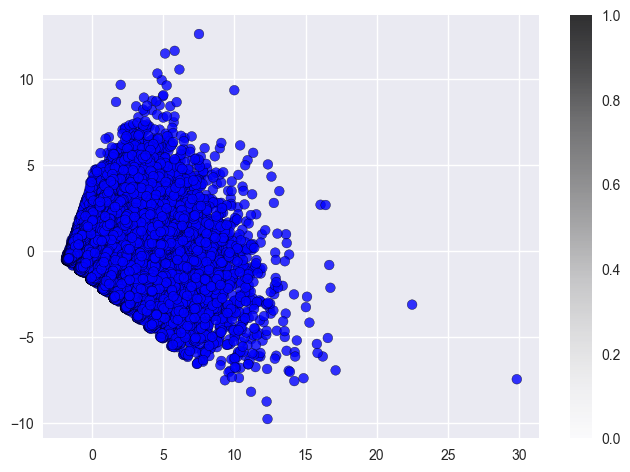

In [43]:
colores = ['red' if i == 0 else 'blue' for i in range(len(project_y))]
plt.scatter(project_y[:, 0], project_y[:, 1],c=colores, edgecolor='black', alpha=.8)
plt.colorbar()
plt.show()

In [44]:
print("La varianza explicada de cada dimensión es de:",dimred.explained_variance_ratio_)
print("En conjunto, ambas dimensiones explican la varianza en un: ",
sum(dimred.explained_variance_ratio_))

NameError: name 'dimred' is not defined

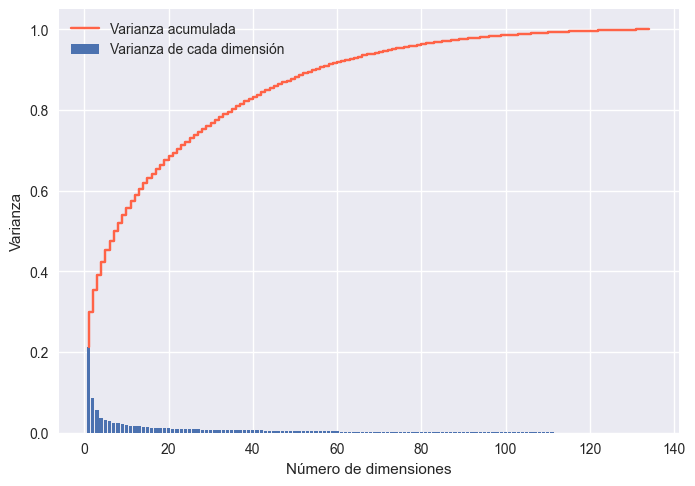

In [ ]:
fetch_dims = PCA().fit(df_crosstab)
dims_quant = len(fetch_dims.components_)
plt.bar(range(1, dims_quant + 1),fetch_dims.explained_variance_ratio_,label="Varianza de cada dimensión")
plt.step(range(1,len(fetch_dims.components_) + 1), np.cumsum(fetch_dims.explained_variance_ratio_),
color='tomato', label="Varianza acumulada")
plt.xlabel('Número de dimensiones')
plt.ylabel('Varianza')
plt.legend()
plt.show()

In [45]:
pca = PCA(n_components=60)
project_z = pca.fit_transform(df_crosstab)
print("Varianza acumulada con 60 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 60 dimensiones: 0.9159377374140214


In [48]:
project_z

array([[-1.64528745e+00, -4.78226292e-01, -1.85796398e-01, ...,
        -4.58481764e-01, -9.03840472e-02,  8.97924117e-03],
       [ 2.16976156e-01,  2.04913816e+00, -1.11439802e+00, ...,
        -2.39966007e-01, -4.71364030e-02,  1.23402163e-03],
       [ 8.97052244e-01,  2.77613045e+00, -1.67630358e+00, ...,
        -4.10527702e-03, -7.61609560e-02, -1.16968200e-02],
       ...,
       [ 2.17230886e+00, -6.42200154e-01,  8.93572111e-01, ...,
        -5.56879551e-02,  1.04505511e+00,  4.73889489e-01],
       [-6.18866848e-02,  9.82471374e-01, -2.19664911e-01, ...,
         2.33498106e-02, -7.99159358e-02, -7.76607263e-04],
       [-2.71062731e-01,  1.40364397e+00,  9.79249235e-02, ...,
        -8.32938058e-02, -1.26510269e-01, -5.97675113e-02]])

Notamos que si disminuye el numero de dimensiones se reduce la varianaza ( es menos suave) ocasionando una perdida de la correlacion entre los datos

Ahora que tenemos la info del dataframe reducida a un arreglo numerico podemos implementar KMEANS

In [52]:
# importamos el modulo
from sklearn.cluster import KMeans
# instanciamos KMeans en un nuevo objeto con 7 como numero de cluster
kmeans = KMeans(n_clusters=7, random_state=5430)
# obtenemos los resultados
fit_results = kmeans.fit_predict(project_y)
kmeans.labels_

d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 4, ..., 5, 0, 0])

Notamos que la matriz de centroides

In [53]:
centroides=kmeans.cluster_centers_
centroides

array([[-0.49341631,  0.55835968],
       [ 6.87005519, -1.80624246],
       [ 3.68429458,  1.49563729],
       [-1.40245846, -0.4120332 ],
       [ 0.91538829,  2.00982289],
       [ 1.02278711, -0.86096532],
       [ 3.15559727, -1.8454626 ]])

Podemos visualizar los clusters

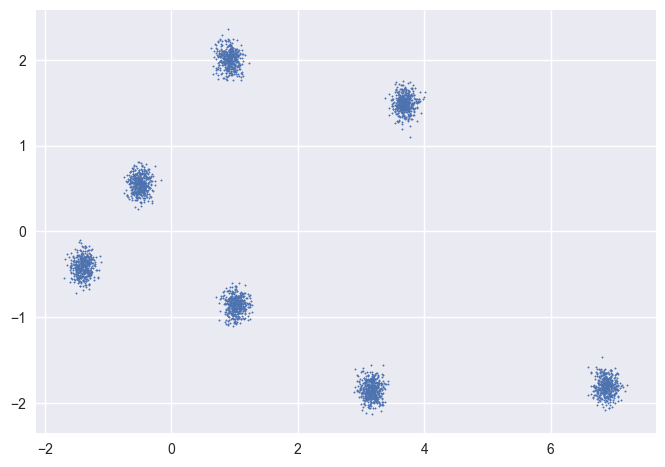

In [54]:
from sklearn.datasets import make_blobs

# Definimos los centros 
bivariate_mu_params = list(centroides)

# Definimos las varianzas
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, .1, .1])
X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params, cluster_std=bivariate_sigma_params, random_state=11238)
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=1)
plt.show()

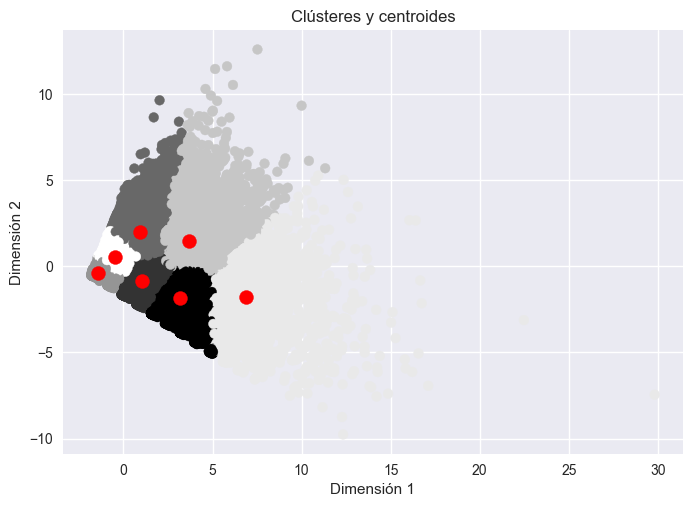

In [ ]:
plt.scatter(project_y[:, 0], project_y[:, 1],c=kmeans.labels_)  # Graficar puntos de datos coloreados por clúster
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='o', s=100)  # Graficar centroides en rojo
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Clústeres y centroides')
plt.show()

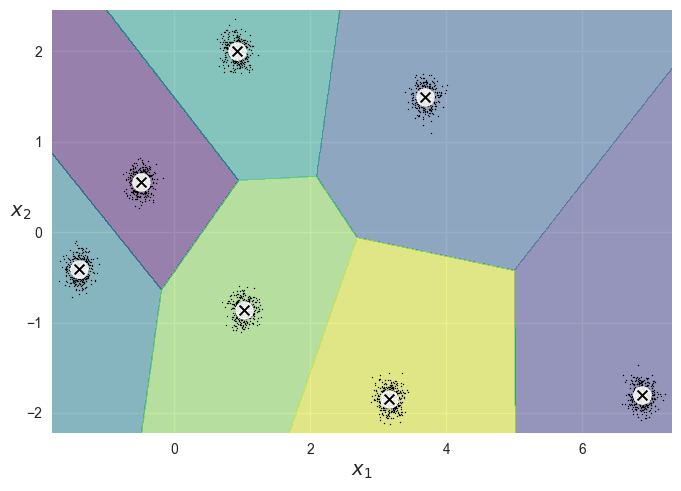

In [57]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="viridis", alpha=.5)
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
        
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=1, linewidths=10,
                color=cross_color, zorder=11, alpha=1)
        
plot_decision_boundaries(kmeans, X_mat)

los clústeres representan grupos o agrupaciones de puntos de datos similares entre sí según la estructura y características de los datos del "proyect_y". Cada punto de datos en un gráfico de clústeres se asigna a un clúster específico y se le asigna un color según su etiqueta de clúster.En este caso notamos que en todas las agrupaciones de datos existe una concentracion en cada grupo de datos. 

In [ ]:
kmeans.inertia_

NameError: name 'kmeans' is not defined

In [ ]:
# generamos un array para guardar los resultados.
inertia = []

# Para cada número entre 1 y 10
for i in range(1, 30):
    # Agregamos la inercia
    inertia.append(KMeans(n_clusters=i, random_state=11238).fit(project_y).inertia_)
    
# graficamos el resultado
plt.plot(range(1, 30), inertia, 'o-', color='red')
plt.xlabel("Cantidad de clusters")
plt.ylabel("Inercia")
plt.title("Elbow graph")
#plt.axvline(4)
plt.show()

NameError: name 'KMeans' is not defined

In [ ]:
# Cargar el dataframe
#df_combinado # Reemplaza 'datos.csv' con la ruta de tu archivo de datos

# Preprocesamiento: normalizar los datos
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_combinado)

# Crear una instancia de PCA y ajustar los datos
#pca = PCA()#
#pca.fit(df_scaled)

# Obtener los componentes principales
#componentes_principales = pca.transform(df_scaled)

# Opcional: obtener la proporción de varianza explicada por cada componente
#varianza_explicada = pca.explained_variance_ratio_

# Crear un nuevo dataframe con los componentes principales
#df_componentes = pd.DataFrame(data=componentes_principales, columns=['Componente {}'.format(i) for i in range(1, pca.n_components_ + 1)])

# Imprimir el nuevo dataframe
#print(df_componentes)
